In [3]:
import numpy as np
from scipy.special import expit
from numpy import logaddexp
from glopt import GLMProblem,SolverSettings
from problems import build_random_logistic,build_logistic_lasso
import matplotlib.pyplot as plt
from scipy.sparse import csc_array,diags_array,csr_array,block_array
from numpy.random import default_rng

## Solve an inequality constrained logistic regression problem

In [4]:
f,A,Q,C,c,b = build_random_logistic(m = 10000,n = 500,k = 100,density=0.1, seed = 2)
problem = GLMProblem(f,A,Q,C,c,b)
x,results = problem.solve()

──────────────────────────────────────────────────────────────────────────────────────────────────────────
Variables:: 500     │ Rows in A: 10,000  │ Equality Constraints: 0       │ Inequality Constraints: 100    
──────────────────────────────────────────────────────────────────────────────────────────────────────────
──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ dual_res  │ cons_viol │ comp_res  │  KKT_res  │    mu    │   Δx    │  step   │ refine │  time  │
──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│    1 │ 6.9315e+05 │  1.84e+03 │  6.41e+00 │  2.97e+02 │  1.84e+03 │  4.9e+02 │ 3.5e-01 │ 3.5e-02 │      1 │   0.14s │
│    2 │ 6.9839e+05 │  1.65e+03 │  5.37e+00 │  1.55e+04 │  1.55e+04 │  3.5e+02 │ 5.2e-01 │ 1.6e-01 │      1 │   0.21s │
│    3 │ 6.8761e+05 │  1.05e+03 │  3.05e+00 │  9.67e+03 │  9.67e+03 │  3.3e+02 │ 5

## Solve an unconstrained logistic regression problem

In [5]:
problem = GLMProblem(f,A,Q,C=None,c=None,b=b)
x,results = problem.solve()

──────────────────────────────────────────────────────────────────────────────────────────────────────────
Variables:: 500     │ Rows in A: 10,000  │ Equality Constraints: 0       │ Inequality Constraints: 0      
──────────────────────────────────────────────────────────────────────────────────────────────────────────
──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ dual_res  │ cons_viol │ comp_res  │  KKT_res  │    mu    │   Δx    │  step   │ refine │  time  │
──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│    1 │ 6.9315e+05 │  3.00e+02 │  0.00e+00 │  1.00e+02 │  3.00e+02 │  1.0e+00 │ 8.3e-01 │ 1.0e+00 │      1 │   0.11s │
│    2 │ 5.8614e+05 │  2.74e+01 │  0.00e+00 │  1.00e+00 │  2.74e+01 │  1.0e-02 │ 2.1e-01 │ 1.0e+00 │      1 │   0.18s │
│    3 │ 5.8259e+05 │  2.81e-01 │  0.00e+00 │  1.00e-02 │  2.81e-01 │  1.0e-04 │ 2

In [6]:
Q

<DIAgonal sparse array of dtype 'float64'
	with 500 stored elements (1 diagonals) and shape (500, 500)>

In [10]:
problem = GLMProblem(Q = np.eye(3),C=None,c=None,b=None)
x,results = problem.solve()

──────────────────────────────────────────────────────────────────────────────────────────────────────────
Variables:: 3       │ Rows in A: 0       │ Equality Constraints: 0       │ Inequality Constraints: 0      
──────────────────────────────────────────────────────────────────────────────────────────────────────────
Failed line search after 0 iterations in 0.01s. Final maxnorm KKT residual: 1.00e+00.


/mnt/team/msca/priv/jira/MSCA-375-spxmod-optimizer/glopt/glopt.py:403: UserWarning: Linesearch Failed!
  warn("Linesearch Failed!")


## Solve a L1 regularized logistic regression

In [2]:
n = 2000
lam = 250.
f,A,Q,C,c,b,x_true = build_logistic_lasso(m = 10000,n = n, seed = 2,lam = lam)
problem = GLMProblem(f,A,Q,C,c,b = b)
xt,results = problem.solve(verbose = True)

x = xt[:n]

──────────────────────────────────────────────────────────────────────────────────────────────────────────
Variables:: 4,000   │ Rows in A: 10,000  │ Equality Constraints: 0       │ Inequality Constraints: 4,000  
──────────────────────────────────────────────────────────────────────────────────────────────────────────
──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ dual_res  │ cons_viol │ comp_res  │  KKT_res  │    mu    │   Δx    │  step   │ refine │  time  │
──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│    1 │ 6.9315e+06 │  2.57e+02 │  0.00e+00 │  6.28e+02 │  6.28e+02 │  3.2e-01 │ 2.5e+00 │ 1.0e+00 │      1 │   1.81s │
│    2 │ 7.9894e+06 │  2.75e+00 │  4.44e-16 │  1.57e+02 │  1.57e+02 │  8.9e-02 │ 1.2e+00 │ 1.0e+00 │      1 │   3.36s │
│    3 │ 7.3898e+06 │  6.16e-01 │  4.44e-16 │  3.77e+01 │  3.77e+01 │  1.4e-01 │ 1

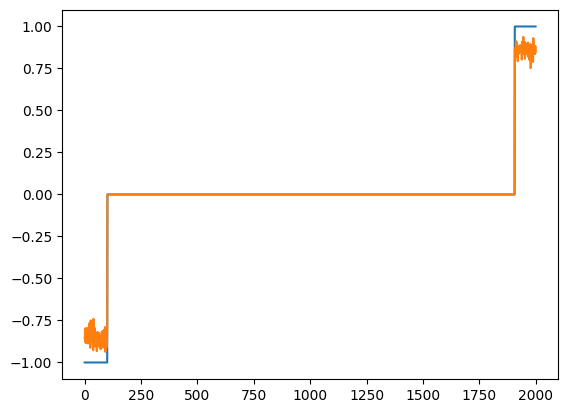

In [4]:
order = np.argsort(x_true)
plt.plot(x_true[order])
plt.plot(x[order])

## Solve a problem with both equality and inequality constraints

In [5]:
m = 50
n = 100
k = 10

f,A,Q,C,c,b = build_random_logistic(m = m,n = n,k = k,density=0.1, seed = 2)

rng = default_rng(10)
E = csr_array(rng.normal(size = (n//2,n)))
e = np.zeros(E.shape[0])


settings = SolverSettings(tau_reg = 1e-6)
problem = GLMProblem(f,A,Q,C,c,b,E = E ,e = e,settings = settings)
x,results = problem.solve(verbose = True,mu0 = 1.) 


──────────────────────────────────────────────────────────────────────────────────────────────────────────
Variables:: 100     │ Rows in A: 50      │ Equality Constraints: 50      │ Inequality Constraints: 10     
──────────────────────────────────────────────────────────────────────────────────────────────────────────
──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ dual_res  │ cons_viol │ comp_res  │  KKT_res  │    mu    │   Δx    │  step   │ refine │  time  │
──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│    1 │ 3.4657e+03 │  1.37e+01 │  9.06e-01 │  7.06e+00 │  1.37e+01 │  3.3e-01 │ 1.5e+00 │ 6.6e-01 │      1 │   0.02s │
│    2 │ 3.3727e+03 │  1.04e+00 │  4.46e-13 │  1.88e+00 │  1.88e+00 │  3.4e-03 │ 7.9e-01 │ 1.0e+00 │      1 │   0.03s │
│    3 │ 3.3521e+03 │  4.55e-01 │  2.42e-12 │  9.63e-01 │  9.63e-01 │  1.6e+00 │ 1

## Solve an equality constrained problem with very colinear constraints

In [6]:
m = 50
n = 100
k = 10

f,A,Q,C,c,b = build_random_logistic(m = m,n = n,k = k,density=0.1, seed = 2)

rng = default_rng(10)
E = csr_array(np.vstack([np.ones(n)]*20))
e = np.zeros(E.shape[0])


settings = SolverSettings(tau_reg = 1e-12,max_iterative_refinement=20)
problem = GLMProblem(f,A,Q,C,c,b,E = E ,e = e,settings = settings)
x,results = problem.solve(verbose = True,mu0 = 1.) 

──────────────────────────────────────────────────────────────────────────────────────────────────────────
Variables:: 100     │ Rows in A: 50      │ Equality Constraints: 20      │ Inequality Constraints: 10     
──────────────────────────────────────────────────────────────────────────────────────────────────────────
──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ dual_res  │ cons_viol │ comp_res  │  KKT_res  │    mu    │   Δx    │  step   │ refine │  time  │
──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│    1 │ 3.4657e+03 │  2.61e+00 │  1.94e-14 │  3.73e+00 │  3.73e+00 │  3.6e-02 │ 2.2e+00 │ 1.0e+00 │      0 │   0.01s │
│    2 │ 3.3334e+03 │  1.32e-01 │  2.11e-15 │  3.77e-02 │  1.32e-01 │  3.6e-04 │ 6.4e-01 │ 9.9e-01 │      1 │   0.03s │
│    3 │ 3.3282e+03 │  1.75e-03 │  8.88e-16 │  3.81e-04 │  1.75e-03 │  3.6e-06 │ 1

In [ ]:
import cvxpy as cp
from scipy.sparse import csc_array
A = csc_array(A)[:,:n]
n = A.shape[1]

beta = cp.Variable(n)
lambd = cp.Parameter(nonneg=True)
neg_log_likelihood = cp.sum(
    cp.multiply(f.w,cp.logistic(A @ beta)- cp.multiply(f.y, A @ beta))
)
regularization = lam*cp.norm1(beta)

problem  = cp.Problem(cp.Minimize(
    (neg_log_likelihood + regularization))
)
problem.solve(verbose = True)

                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) Apr 18 10:08:32 PM: Your problem has 500 variables, 0 constraints, and 0 parameters.
(CVXPY) Apr 18 10:08:32 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 18 10:08:32 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 18 10:08:32 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Apr 18 10:08:32 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 18 10:08:32 PM: Compiling problem (target solver=CLARABEL).

6895002.804744771

In [10]:
np.ones(1)

array([1.])